In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [133]:
# all house
zhvi_all = pd.read_csv( r"C:\Git_Repo\AddressQuery\data\Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv" )
zhvi_all = zhvi_all[ zhvi_all['City'] == 'New York' ].copy()
zhvi_all = zhvi_all.drop(['RegionID','SizeRank','RegionType','StateName','State','City','Metro','CountyName'], axis = 1 )
zhvi_all['type'] = 'all'
# zhvi_all = zhvi_all.set_index('RegionName')

zhvi_sf = pd.read_csv( r"C:\Git_Repo\AddressQuery\data\Zip_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv" )
zhvi_sf = zhvi_sf[ zhvi_sf['City'] == 'New York' ].copy()
zhvi_sf = zhvi_sf.drop(['RegionID','SizeRank','RegionType','StateName','State','City','Metro','CountyName'], axis = 1 )
zhvi_sf['type'] = 'Single Family'
# zhvi_sf = zhvi_sf.set_index('RegionName')

zhvi_condo = pd.read_csv( r"C:\Git_Repo\AddressQuery\data\Zip_zhvi_uc_condo_tier_0.33_0.67_sm_sa_month.csv" )
zhvi_condo = zhvi_condo[ zhvi_condo['City'] == 'New York' ].copy()
zhvi_condo = zhvi_condo.drop(['RegionID','SizeRank','RegionType','StateName','State','City','Metro','CountyName'], axis = 1 )
zhvi_condo['type'] = 'Condo'
# zhvi_condo = zhvi_condo.set_index('RegionName')

zhvi = pd.concat( [zhvi_all, zhvi_sf, zhvi_condo] )
zhvi = zhvi.sort_values(['RegionName','type'])
zhvi = zhvi.set_index(['RegionName','type'])
zhvi 


2000-01-31     2000-02-29     2000-03-31  \
RegionName type                                                         
10001      Condo          286872.857150  289226.332548  291594.265717   
           Single Family            NaN            NaN            NaN   
           all            301698.199212  304253.307589  306768.711404   
10002      Condo          146957.995665  145397.495922  145094.605731   
           Single Family            NaN            NaN            NaN   
...                                 ...            ...            ...   
11692      all            130468.307965  131407.700120  130707.400806   
11693      Single Family  154984.185179  158356.414321  160011.161442   
           all            120364.572507  122821.687728  123965.461145   
11694      Single Family  407755.237668  411153.302500  414896.197592   
           all            171958.173148  173436.149421  175033.415692   

                             2000-04-30     2000-05-31     2000-06-30  \
RegionName type                                                         
10001      Condo          295907.553803  301041.403857  305846.504632   
           Single Family            NaN            NaN            NaN   
           all            311335.703421  316741.665611  321857.116299   
10002      Condo          144682.686101  146176.042462  147672.134222   
           Single Family            NaN            NaN            NaN   
...                                 ...            ...            ...   
11692      all            130252.570341  129244.440774  130138.215830   
11693      Single Family  163002.813330  164048.030495  165382.954447   
           all            126023.734338  126606.785713  127536.197717   
11694      Single Family  420889.518727  425840.121175  431310.103497   
           all            177619.170170  179707.657859  181811.356852   

                             2000-07-31     2000-08-31     2000-09-30  \
RegionName type                                                         
10001      Condo          310663.242125  309730.719326  307580.282895   
           Single Family            NaN            NaN            NaN   
           all            327033.672233  326066.042810  323658.369941   
10002      Condo          149191.876577  149851.436325  150000.124507   
           Single Family            NaN            NaN            NaN   
...                                 ...            ...            ...   
11692      all            131504.758282  133764.364338  135520.752527   
11693      Single Family  166918.948483  168361.435124  168613.202527   
           all            128729.857813  129988.878416  130380.844066   
11694      Single Family  438062.334451  445553.432115  452161.020458   
           all            184337.533223  187198.757295  189879.886519   

                             2000-10-31  ...    2022-06-30    2022-07-31  \
RegionName type                          ...                               
10001      Condo          303397.337240  ...  1.689793e+06  1.704606e+06   
           Single Family            NaN  ...  1.020208e+06  1.034102e+06   
           all            319050.125552  ...  1.647253e+06  1.656570e+06   
10002      Condo          149900.725579  ...  1.113858e+06  1.108021e+06   
           Single Family            NaN  ...  1.366476e+06  1.362088e+06   
...                                 ...  ...           ...           ...   
11692      all            137564.597455  ...  4.479494e+05  4.519663e+05   
11693      Single Family  169032.771666  ...  5.317636e+05  5.379649e+05   
           all            130969.183391  ...  4.193693e+05  4.080417e+05   
11694      Single Family  458059.783577  ...  1.037235e+06  1.043309e+06   
           all            192625.265747  ...  6.553874e+05  6.580813e+05   

                            2022-08-31    2022-09-30    2022-10-31  \
RegionName type                                                      
10001      Condo          1.701055e+06  1.669259e+

In [134]:
forecast = pd.read_csv( r"C:\Git_Repo\AddressQuery\data\Zip_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_month.csv" )
forecast = forecast[ forecast['City'] == 'New York' ].copy()
forecast = forecast.drop(['RegionID','SizeRank','RegionType','StateName','State','City','Metro','CountyName'], axis = 1 )

forecast.head()

,RegionName,BaseDate,2023-04-30,2023-06-30,2024-03-31
3,11368,2023-03-31,0.1,0.4,-0.5
5,11385,2023-03-31,0.1,0.4,-0.5
7,11208,2023-03-31,0.1,0.5,-0.6
14,11373,2023-03-31,0.1,0.4,-0.4
15,10467,2023-03-31,0.1,0.7,-0.8


In [135]:
today = zhvi_all.columns[-2]
forecast = forecast.join( zhvi_all[ [today,"RegionName"] ].set_index("RegionName"), on = 'RegionName', how = 'left' )

forecast

,RegionName,BaseDate,2023-04-30,2023-06-30,2024-03-31,2023-03-31
3,11368,2023-03-31,0.1,0.4,-0.5,320049.843886
5,11385,2023-03-31,0.1,0.4,-0.5,743864.435084
7,11208,2023-03-31,0.1,0.5,-0.6,615973.232234
14,11373,2023-03-31,0.1,0.4,-0.4,368761.419812
15,10467,2023-03-31,0.1,0.7,-0.8,239929.574571
...,...,...,...,...,...,...
30477,10177,2023-03-31,0.1,0.6,-0.8,NaN
30478,10178,2023-03-31,0.1,0.6,-0.8,NaN
30479,10278,2023-03-31,0.1,0.6,-0.8,NaN
30480,11371,2023-03-31,0.1,0.6,-0.8,NaN


(0.0, 3500000.0)

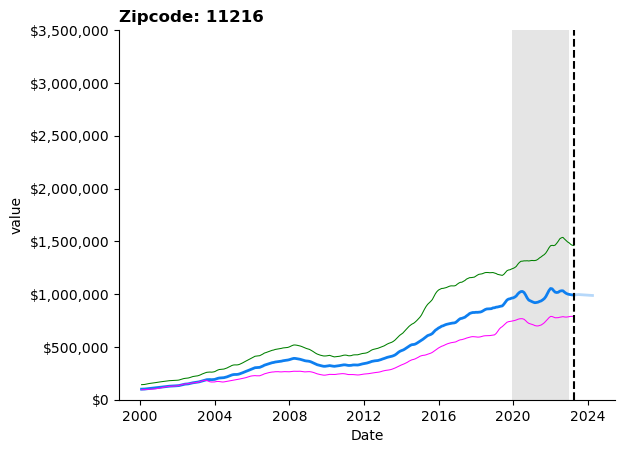

In [185]:
zipcode = 11216

# ZHVI ALL
t = zhvi_all[ zhvi_all['RegionName'] == zipcode ].copy()
t = t.drop(['RegionName','type'], axis = 1 )
t = t.stack().reset_index().rename( columns = {0:'value','level_1':'Date'} )
t['Date'] = pd.to_datetime( t['Date'] )

# ZHVI SF
t_sf = zhvi_sf[ zhvi_sf['RegionName'] == zipcode ].copy()
t_sf = t_sf.drop(['RegionName','type'], axis = 1 )
t_sf = t_sf.stack().reset_index().rename( columns = {0:'value','level_1':'Date'} )
t_sf['Date'] = pd.to_datetime( t_sf['Date'] )

# ZHVI CONDO
t_condo = zhvi_condo[ zhvi_condo['RegionName'] == zipcode ].copy()
t_condo = t_condo.drop(['RegionName','type'], axis = 1 )
t_condo = t_condo.stack().reset_index().rename( columns = {0:'value','level_1':'Date'} )
t_condo['Date'] = pd.to_datetime( t_condo['Date'] )

# FORECAST
forecast_zip = forecast[ forecast['RegionName'] == zipcode ].copy()
forecast_zip = forecast_zip.set_index(['RegionName','BaseDate'])

value_today = forecast_zip[today].values[0]

forecast_zip = forecast_zip.drop( today, axis = 1 )
forecast_zip = forecast_zip.div(100)
forecast_zip = value_today + (forecast_zip * value_today)
forecast_zip = forecast_zip.stack().reset_index().drop('BaseDate',axis=1).rename( columns = {0:'value','level_2':'Date'} )
forecast_zip['Date'] = pd.to_datetime( forecast_zip['Date'] )

fig,ax = plt.subplots()
sns.lineplot( x = 'Date', y = 'value', data = t ,ax=ax, color='#0e7ff0', lw=2 )
sns.lineplot( x = 'Date', y = 'value', data = forecast_zip , color='#0e7ff0', lw=2 ,alpha=0.3, ax=ax)
sns.lineplot( x = 'Date', y = 'value', data = t_sf , color='green', ax=ax, lw=0.75)
sns.lineplot( x = 'Date', y = 'value', data = t_condo , color='magenta', ax=ax, lw=0.75 )
sns.despine(ax=ax)

ax.axvline( x = pd.to_datetime(today), color = 'k', linestyle = '--' )
ax.axvspan( pd.to_datetime("2019-12-01"), pd.to_datetime('2023-01-01'), alpha=0.1, ec='none',facecolor='k' )
# y-ticks format 
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

ax.set_title( f"Zipcode: {zipcode}", x=0 , ha='left', fontsize=12, fontweight='bold' )
ax.set_ylim(0,3500000)